In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import seaborn as sns

In [2]:
import os

In [3]:
os.chdir('C:\\Users\\krish\\Downloads\\Jupyter Losse files\\Casestudy1')

In [4]:
data= pd.read_csv("dm.csv")

In [5]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [6]:
data.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [7]:
data.describe()

,Salary,Children,Catalogs,AmountSpent,Cust_Id
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000,643.930000
std,30616.314826,1.05107,6.622895,961.068613,369.047166
min,10100.000000,0.00000,6.000000,38.000000,12.000000
25%,29975.000000,0.00000,6.000000,488.250000,316.750000
50%,53700.000000,1.00000,12.000000,962.000000,636.000000
75%,77025.000000,2.00000,18.000000,1688.500000,955.500000
max,168800.000000,3.00000,24.000000,6217.000000,1297.000000


In [8]:
# cateogrizing the data in to target and ordinary data.
data["target"]= data["AmountSpent"].map(lambda x: 1 if x>data["AmountSpent"].mean() else 0)

In [9]:
#dropping the AmountSpent columns as we now have the target column
data= data.drop("AmountSpent", axis=1)

In [10]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [11]:
data["History"].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [14]:
data["History"].isnull().sum()

303

In [15]:
## minimal data prep
data["History"]= data["History"].fillna("NewCust")

In [16]:
data.describe()

,Salary,Children,Catalogs,Cust_Id,target
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,643.930000,0.399000
std,30616.314826,1.05107,6.622895,369.047166,0.489938
min,10100.000000,0.00000,6.000000,12.000000,0.000000
25%,29975.000000,0.00000,6.000000,316.750000,0.000000
50%,53700.000000,1.00000,12.000000,636.000000,0.000000
75%,77025.000000,2.00000,18.000000,955.500000,1.000000
max,168800.000000,3.00000,24.000000,1297.000000,1.000000


In [21]:
data["History"].isnull().sum()

0

In [22]:
## Build Model
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [20]:
data_train=data.sample(frac=0.70,random_state=200)
data_test=data.drop(data_train.index)

In [23]:
model1=smf.glm("target~C(Age)+C(Gender)+C(OwnHome)+C(Married)+C(Location)+Salary+Children+C(History)+Catalogs",data=data_train,
              family=sm.families.Binomial()).fit()

In [24]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  700
Model:                            GLM   Df Residuals:                      687
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -166.95
Date:                Tue, 06 Oct 2020   Deviance:                       333.91
Time:                        13:43:24   Pearson chi2:                     399.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -5.82

In [25]:
## Variables to exclude
#Age
#Gender
#Ownhome
#Married
## Variables for dummy creation
#Hist_Low
#Hist_Medium
data_train['Hist_Med']=data_train['History'].map(lambda x: 1 if x=="Medium" else 0)
data_test['Hist_Med']=data_test['History'].map(lambda x: 1 if x=="Medium" else 0)

In [26]:
model2=smf.glm("target~Children+Catalogs+Salary+Hist_Med",data=data_train,
              family=sm.families.Binomial()).fit()

In [27]:
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  700
Model:                            GLM   Df Residuals:                      695
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -219.08
Date:                Tue, 06 Oct 2020   Deviance:                       438.16
Time:                        13:50:29   Pearson chi2:                     641.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4955      0.556    -11.688      0.0

In [33]:
## Let's check confusion matrix and AUC
import sklearn.metrics as metrics

In [29]:
y_true=data_test['target']
y_pred=model2.predict(data_test)

In [31]:
y_pred.head()

0     0.133072
2     0.112537
6     0.088037
7     0.875422
10    0.124423
dtype: float64

In [32]:
y_true=data_test['target']
y_pred=model2.predict(data_test).map(lambda x:1 if x>0.5 else 0)
metrics.confusion_matrix(y_true,y_pred)

# error of 20 and 15 customers as Type 1 and Type 2 errors.

array([[159,  15],
       [ 20, 106]], dtype=int64)

In [34]:
## ROC curve
y_score=model2.predict(data_test)
fpr,tpr,thresholds=metrics.roc_curve(y_true,y_score)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

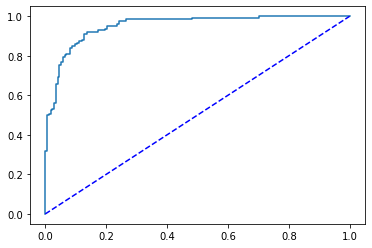

In [35]:
plt.plot(fpr,tpr,"-")
plt.plot(x,y,'b--')

In [36]:
## AUC
metrics.roc_auc_score(y_true,y_score)

0.9516967706622879

In [37]:
## Gains
data_test['prob']=model2.predict(data_test)

In [38]:
data_test['prob'].head()

0     0.133072
2     0.112537
6     0.088037
7     0.875422
10    0.124423
Name: prob, dtype: float64

In [39]:
data_test['prob_deciles']=pd.qcut(data_test['prob'],q=10)

In [40]:
data_test.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target,Hist_Med,prob,prob_deciles
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0,0,0.133072,"(0.107, 0.24]"
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0,0,0.112537,"(0.107, 0.24]"
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,804,0,1,0.088037,"(0.0507, 0.107]"
7,Middle,Male,Own,Single,Close,68400,0,High,18,790,0,0,0.875422,"(0.754, 0.898]"
10,Young,Male,Rent,Married,Close,43700,1,NewCust,12,157,0,0,0.124423,"(0.107, 0.24]"


In [41]:
data_test.sort_values('prob',ascending=False).head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target,Hist_Med,prob,prob_deciles
901,Old,Female,Own,Married,Far,128700,0,High,24,1164,1,0,0.999451,"(0.965, 0.999]"
386,Old,Male,Own,Married,Close,123000,0,High,24,584,1,0,0.999168,"(0.965, 0.999]"
928,Old,Male,Own,Married,Close,168800,0,High,6,1286,1,0,0.999086,"(0.965, 0.999]"
216,Middle,Female,Rent,Married,Far,120800,1,High,24,1227,1,0,0.997484,"(0.965, 0.999]"
504,Old,Female,Own,Married,Close,118800,0,High,18,1276,1,0,0.996444,"(0.965, 0.999]"


In [42]:
gains=data_test.groupby("prob_deciles",as_index=False)['target'].agg(['sum','count']).reset_index().sort_values("prob_deciles",
                 ascending=False)

In [43]:
gains.columns=["Deciles","TotalEvents","NumberObs"]

In [44]:
gains["PercEvents"]=gains['TotalEvents']/gains['TotalEvents'].sum()

In [45]:
gains["CumulativeEvents"]=gains.PercEvents.cumsum()

In [46]:
gains

,Deciles,TotalEvents,NumberObs,PercEvents,CumulativeEvents
9,"(0.965, 0.999]",30,30,0.238095,0.238095
8,"(0.898, 0.965]",29,30,0.230159,0.468254
7,"(0.754, 0.898]",24,30,0.190476,0.658730
6,"(0.515, 0.754]",23,30,0.182540,0.841270
5,"(0.24, 0.515]",11,30,0.087302,0.928571
4,"(0.107, 0.24]",7,30,0.055556,0.984127
3,"(0.0507, 0.107]",1,30,0.007937,0.992063
2,"(0.026, 0.0507]",0,30,0.000000,0.992063
1,"(0.0108, 0.026]",1,30,0.007937,1.000000
0,"(-0.000415, 0.0108]",0,30,0.000000,1.000000


In [49]:
data_test.sort_values("prob",ascending=False)[['Cust_Id']].head(90)## These are the people to target

,Cust_Id
901,1164
386,584
928,1286
216,1227
504,1276
...,...
774,209
429,341
363,137
333,801
